(stability-chapter)=
# Stability

The stability of a numerical solver for ordinary differential equations refers to its ability to produce accurate and reliable solutions over a long interval, without the computed values of the solution becoming unbounded or oscillatory. In other words, a stable numerical solver for ODEs is one that does not produce solutions that blow up or oscillate wildly as time goes on.

For example, consider the Euler method solution to the following initial value problem using step lengths of $h = 0.25$ and $h = 0.125$

$$ y' = -15y, \qquad t \in [0, 1], \qquad y(0) = 1. $$

The exact solution for this initial value problem is $y = e^{-15t}$ and the numerical solutions are plotted against the exact solution in {numref}`stability-plot-1-figure`. Here we can see that the solution using $h = 0.125$ remains bounded whereas the solution using $h = 0.25$ diverges.

:::{glue:figure} stability-plot-1
:name: stability-plot-1-figure
:figwidth: 600

Solutions to the initial value problem $y' = -15y$, $t\in [0, 1]$ and $y(0) = 1$ using the Euler method with $h=0.25$ and $h=0.125$.
:::

The solution using $h = 0.125$ is an example of a **stable** solution where the numerical solution remains bounded whereas the solution using $h = 0.25$ is an example of an **unstable** solution which is unbounded. The reason for the instability is due to the truncation of the Taylor series. We saw in the section on [error analysis](error-analysis-section) that the higher order terms that are omitted due to truncation causes a {prf:ref}`local truncation error<lte-definition>`, $\tau$, and the accumulation of these local truncation errors creates the {prf:ref}`global truncation error<gte-definition>`. If the local truncation error is too large then the global truncation error will eventually diverge as seen in {numref}`stability-plot-1-figure` causing the solution to be unusable. This provides us with the definition of stability. 

::::{prf:definition} Stability
:label: stability-definition

If $\tau_n$ is the local truncation error of a numerical method defined by

\begin{align*}
    \tau_n = |y_n - \tilde{y}_n|,
\end{align*}
   
where $\tilde{y}_n$ is the exact solution and $y_n$ the numerical approximation then the method is considered **stable** if

$$ |\tau_{n+1} - \tau_n | \leq 1, $$(stability-equation)

for all steps of the method. If a method is not stable then it is **unstable**.
::::

(stiffness-section)=
## Stiffness

The stability of a numerical solver for ODEs is closely related to the stiffness of the ODEs being solved. Stiff ODEs are those where the solution varies over several orders of magnitude or changes rapidly over a small interval, compared to the domain of the ODEs. In such cases, standard numerical solvers may produce inaccurate or unstable solutions if the time step used in the computation is not small enough to capture the fast dynamics of the problem.

There is no mathematical definition of what makes an ODE stiff, however, a useful description is provided by {cite:t}`lambert:1991`

>*If a numerical method with a finite region of absolute stability, applied to a system with any initial conditions, is forced to use in a certain interval of integration a step length which is excessively small in relation to the smoothness of the exact solution in that interval, then the system is said to be stiff in that interval.*

### Stiffness ratio

Stiffness is not strictly defined but we can attempt to define a metric to help us determine whether an ODE is stiff.  Consider a system of linear ODEs for the form

$$ \mathbf{y}' = A \mathbf{y}, $$

Let $P = \begin{pmatrix} \boldsymbol{\alpha}_1 & \boldsymbol{\alpha}_2 & \cdots & \boldsymbol{\alpha}_n \end{pmatrix}$ be a matrix containing the <a href="https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors" target="_blank">eigenvalues</a> of $A$ then by the definition of an eigenvector, $A \boldsymbol{\alpha}_i = \lambda_i \boldsymbol{\alpha}_1$

$$A P = \begin{pmatrix} \lambda_1 \boldsymbol{\alpha}_1 & \lambda_2 \boldsymbol{\alpha}_2 & \cdots & \lambda_n\boldsymbol{\alpha}_n \end{pmatrix} = P 
\begin{pmatrix}
    \lambda_1 \\
    & \lambda_2 \\
    & & \ddots \\
    & & & \lambda _n
\end{pmatrix}.$$

Let $D$ denote the diagonal matrix of eigenvalues $\lambda_i$ and left multiplying both sides by $P^{-1}$ gives

$$ P^{-1} A P = D. $$

This means we can **diagonalise** the matrix $A$. Let $\mathbf{u} = P^{-1} A P \mathbf{y}$ then

$$ \begin{align*}
    \begin{pmatrix} u_1' \\ u_2' \\ \vdots \\ u_n' \end{pmatrix} = 
    \begin{pmatrix}
        \lambda_1 \\
        & \lambda_2 \\
        && \ddots \\
        &&& \lambda_n
    \end{pmatrix}
    \begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_n \end{pmatrix} =
    \begin{pmatrix} \lambda_1 u_1 \\ \lambda_2 u_2 \\ \vdots \\ \lambda_n u_n \end{pmatrix}.
\end{align*} $$ 

Each equation in the transformed system is in the form $u' = \lambda u$ which has the solution  $u_i = e^{\lambda_i t}$. The fastest growing solution will be for the equation with the largest value of $\lambda$ and the slowest growing solution will be for the equation with the smallest value of $\lambda$. Stiffness occurs when there is a large variation in the solutions of equations in a system so we can gauge this by calculating the ratio between the largest and smallest eigenvalues of $A$. 

:::{prf:definition} Stiffness ratio
:label: stiffness-ratio-definition

The **stiffness ratio** for a system of ODEs of the form $\mathbf{y}' = A \mathbf{y}$ is

$$ S = \frac{\max_i(|\lambda_i|)}{\min_i(|\lambda_i|)} $$

where $\lambda_i$ are the eigenvalues of $A$.

:::

If the stiffness ratio of a system of ODEs is large then the system is considered to be stiff. 

::::{prf:example}
Determine the stiffness ratio of the following ODE

$$ y'' + 1001 y' + 1000 y = 0.$$

:::{dropdown} Solution (click to show)

Rewriting the second-order ODE as a system of two first-order ODEs

$$ \begin{align*}
    y_1' &= y_2, \\
    y_2' &= -1000 y_1 - 1001 y_2.
\end{align*} $$

which can be written as the matrix equation

$$ \begin{align*}
    \begin{pmatrix} y_1' \\ y_2' \end{pmatrix} =
    \begin{pmatrix} 0 & 1 \\ -1000 & -1001 \end{pmatrix}
    \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}.
\end{align*} $$

Calculating the eigenvalues of the coefficient matrix

$$ \begin{align*}
    0 &= \begin{vmatrix} -\lambda & 1 \\ -1000 & -1001 - \lambda \end{vmatrix} 
    = \lambda^2 + 1001 \lambda + 1000 = (\lambda + 1000) (\lambda + 1),
\end{align*} $$

so the eigenvalues are $\lambda_1 = -1000$ and $\lambda_2 = -1$. The stiffness ratio is 

$$S = \frac{|-1000|}{|-1|} = 1000.$$

Since $S = 1000$ is not too large then this system is not considered to be stiff. For practical problems the stiffness ration of $10^{6}$ can be common.   
:::
::::

### Solving stiff systems

Different ODE solvers have different stability properties and are stable over larger values of $h$. For example the <a href="https://en.wikipedia.org/wiki/Backward_Euler_method" target="_blank">implicit Euler method</a> is an A-stable method meaning that it is stable for any value of $h$.

$$ y_{n+1} = y_n + h f(t_{n+1}, y_{n+1}) $$

A comparison of the Euler and implicit Euler methods used to solve the same initial value problem as before is shown in {numref}`stability-plot-2-figure` where the implicit Euler method solutions remain bounded despite using the same step length. 

:::{glue:figure} stability-plot-2
:name: stability-plot-2-figure
:figwidth: 600

Solutions to the initial value problem $y' = -15y$, $t\in [0, 1]$ and $y(0) = 1$ using the Euler and implicit Euler methods with $h=0.25$.
:::

So if we were constrained with using a step length of $h=0.25$ then we could choose the implicit Euler method to solve this initial value problem. 

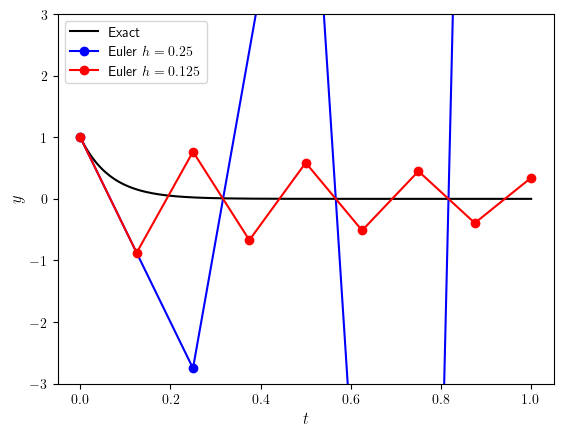

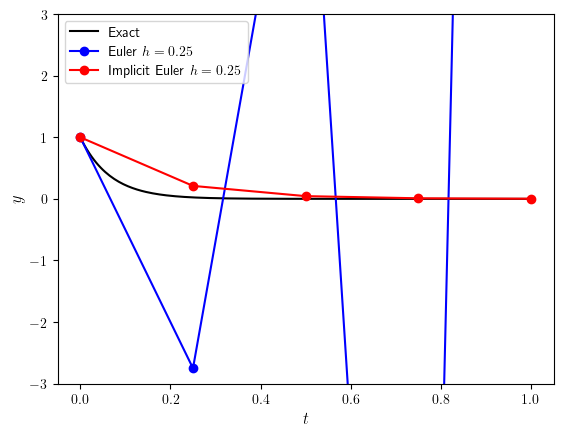

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

def euler(f, tspan, y0, h): 

    # Initialise t and y arrays
    t = np.empty(100000)
    y = np.empty((100000,len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps
    n = 0
    while t[n] < tspan[1]:

        # Ensure t does not exceed tspan[1]
        h = min(h, tspan[1] - t[n])
        
        # Calculate Euler method
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h
        n += 1
        
    return t[:n+1], y[:n+1,:]


def implicit_euler(f, tspan, y0, h): 

    # Initialise t and y arrays
    t = np.empty(100000)
    y = np.empty((100000,len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps
    n = 0
    while t[n] < tspan[1]:

        # Ensure t does not exceed tspan[1]
        h = min(h, tspan[1] - t[n])
        
        # Calculate Euler method
        y[n+1,:] = y[n,:] / (1 + 15 * h)
        t[n+1] = t[n] + h
        n += 1
        
    return t[:n+1], y[:n+1,:]


# Define ODE function and exact solution
def f(t, y):
    return -15 * y

def exact(t):
    return np.exp(-15 * t)


# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h1 = 0.25       # step length
h2 = 0.125

# Calculate the solution to the IVP
t1, y1 = euler(f, tspan, y0, h1)
t2, y2 = euler(f, tspan, y0, h2)
t3, y3 = implicit_euler(f, tspan, y0, h1)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t1, y1, "bo-", label=f"Euler $h = {h1:0.2f}$")
plt.plot(t2, y2, "ro-", label=f"Euler $h = {h2:0.3f}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.ylim([-3,3])
plt.legend()
plt.show()

from myst_nb import glue
glue("stability-plot-1", fig, display=False)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t1, y1, "bo-", label=f"Euler $h = {h1:0.2f}$")
plt.plot(t3, y3, "ro-", label=f"Implicit Euler $h = {h1:0.2f}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.ylim([-3,3])
plt.legend(loc='upper left')
plt.show()

from myst_nb import glue
glue("stability-plot-2", fig, display=False)